# Accessing Twitter

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**The Structure of a Tweet**

There are various components of a tweet that you can use to extract information:

* User Name: This is how each unique user is identified.
* Time Stamp: When the tweet was sent.
* Tweet Text: The body of the tweet - needs to be 140 characters of less!
* Hashtags: Always proceeded by a # symbol. A hashtag is often describes a particular event or can be related to a particular topic. It is a way for users to communicate with a particular group of people on twitter - for instance those attending a conference #agu2016 or those using r #rstats.
* Links: Links can be embedded within a tweet. Links are a way that users share information.
* Embedded Media: tweets can contain pictures and videos. The most popular tweets often contain pictures.
* Replies: When someone posts a tweet, another user can reply directly to that user - similar to a text message except the message is visible to the public.
* Retweets: a retweet is when someone shares a tweet with their followers.
* Favorites: You can “like” a tweet to keep a history of content that you like in your account.
* Latitude/Longitude: about 1% of all tweets contains coordinate information.

## Tweepy

In [1]:
pip install tweepy

     |████████████████████████████████| 77 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 151 kB 3.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load credentials from json file
import json
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)

In [4]:
import os
import tweepy as tw

### Version 1.1

In [73]:
auth = tw.OAuthHandler(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'],creds['ACCESS_TOKEN'], creds['ACCESS_SECRET'])
#api = tw.API(auth, wait_on_rate_limit=True)
# api is for v1.1
api = tw.API(auth)

In [56]:
# Show tweets from my timeline
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

RT @wonderofscience: The Sun unleashing a spectacular solar flare and coronal mass ejection, captured by the Solar Dynamics Observatory spa…
RT @SethCotlar: It's easy to forget that these White Citizens Councils (tho they eventually dropped the "White" part) existed in many local…
RT @SethCotlar: Shannon was a very early advocate of the idea that the GOP should strive to win white Southern voters from the Democrats by…
The EU can't quite get it together on a Russian oil embargo via @voxdotcom https://t.co/sSTkzMmOfc
RT @SethCotlar: Shreveport Journal, 17 November 1970. Not hard to understand why George Wallace gave a speech at Shannon's retirement party…
RT @SethCotlar: Needless to say, that honky, Shannon, did not refrain from just spelling the n-word out, multiple times.
RT @SethCotlar: The article was a riposte to “Julian Bond, black male” who filed suit in response to the FCC’s decision NOT to ban the use…
RT @SethCotlar: It appeared in this publication, the managing editor of whic

In [59]:
# Get the User object for twitter...
user = api.get_user(screen_name='SentimentVoter')

In [60]:
print(user.screen_name)
print(user.followers_count)
for friend in user.friends():
   print(friend.screen_name)

SentimentVoter
15
jrpsaki
DisinfoIndex
SearchDigitalHQ
theMAGAlion
cwilken
progressivepush
electroboyusa
Cruellaisdevine
vickicon72
kevincaldwell
confunctionist
CadillacCT52021
politicalHEDGE
OxfordDiplomat
politvidchannel
SKYRIDER4538
SierraWhiskee
AndyWendt
jennycohn1
UROCKlive1


### Version 2: Search recent tweets

In [61]:
bearer_token = 'AAAAAAAAAAAAAAAAAAAAALMnRAEAAAAA8TDZBChiNl5r53dC1TZv5Up%2FPwc%3DxbJP8drF9RPVanjJOpopguadETGOHWe4jRCeQZPRkbhKYggUxo'

In [62]:
#client = tw.Client(consumer_key=creds['CONSUMER_KEY'], consumer_secret=creds['CONSUMER_SECRET'],\
#                   access_token=creds['ACCESS_TOKEN'], access_token_secret=creds['ACCESS_SECRET'])
client = tw.Client(bearer_token)
# Search Recent Tweets

# This endpoint/method returns Tweets from the last seven days
# user_auth = true: if not use bearer_token
#response = client.search_recent_tweets("Supreme Court", user_auth = True) 

response = client.search_recent_tweets("Supreme Court", max_results=10)
# The method returns a Response object, a named tuple with data, includes,
# errors, and meta fields
print(response.meta)

# In this case, the data field of the Response returned is a list of Tweet
# objects
tweets = response.data

# Each Tweet object has default ID and text fields
for tweet in tweets:
    print(tweet.id)
    print(tweet.text)

{'newest_id': '1523053247933861889', 'oldest_id': '1523053240832897024', 'result_count': 10, 'next_token': 'b26v89c19zqg8o3fpywm1v6b172e3d66odr7uq2jl4hvh'}
1523053247933861889
RT @PaulCogan: Conservative Supreme Court Justice Barrett, wrote a brief about abortion. She noted the USA needed a “domestic supply of inf…
1523053247816212480
@skymelilemyks @farid__jalali Well, about that. Now that the Supreme Court has decided that a woman’s body can be used for medical purposes, even at risk of her own life, we may as well go full Monty Python. 

https://t.co/obEaKACP7E
1523053247543398400
His wife helped plan an attempted coup, and he wouldn’t recuse himself on matters before the Court related to the events. Who doesn’t respect institutions here? https://t.co/kmaNkcb8h0
1523053246612340736
RT @PaulCogan: Conservative Supreme Court Justice Barrett, wrote a brief about abortion. She noted the USA needed a “domestic supply of inf…
1523053246578790400
RT @OccupyDemocrats: BREAKING: Supreme Cour

In [65]:
# You can specify additional Tweet fields to retrieve using tweet_fields
response = client.search_recent_tweets(
    "abortion", tweet_fields=['id',"created_at", "lang",'source']
)
tweets = response.data

# You can then access those fields as attributes of the Tweet objects
for tweet in tweets:
    print(tweet.id, tweet.lang,tweet['source'],tweet['created_at'])

# There’s also a data attribute/key that provides the entire data dictionary
for tweet in tweets:
    print(tweet.data)

1523057698274643969 en Twitter for Android 2022-05-07 21:50:26+00:00
1523057698157531136 en Twitter for iPhone 2022-05-07 21:50:26+00:00
1523057698031374336 en Twitter for iPhone 2022-05-07 21:50:26+00:00
1523057697808998400 und Twitter for iPhone 2022-05-07 21:50:26+00:00
1523057697570308096 en Twitter for iPhone 2022-05-07 21:50:26+00:00
1523057696718553088 en Twitter for iPhone 2022-05-07 21:50:26+00:00
1523057696593047552 en Twitter for Android 2022-05-07 21:50:26+00:00
1523057696508944384 en Twitter for iPhone 2022-05-07 21:50:26+00:00
1523057695015677953 en Twitter for Android 2022-05-07 21:50:26+00:00
1523057693740748815 en Twitter Web App 2022-05-07 21:50:25+00:00
{'id': '1523057698274643969', 'lang': 'en', 'text': "RT @Denton21990: I'm hearing all these nightmare scenario's if a woman chooses to have an abortion. Some states want to call it murder &amp; ch…", 'created_at': '2022-05-07T21:50:26.000Z', 'source': 'Twitter for Android'}
{'id': '1523057698157531136', 'lang': 'en', 

In [43]:
# Get User's Tweets

# This endpoint/method returns Tweets composed by a single user, specified by
# the requested user ID

user_id = 813286

response = client.get_users_tweets(user_id)

# By default, only the ID and text fields of each Tweet will be returned
for tweet in response.data:
    print(tweet.id)
    print(tweet.text)

1522622624756637697
Happy birthday to one of the greats, Willie Mays! I’ll always remember this conversation we had while on Air Force One during the first year of my presidency. I’ve always looked up to the Say Hey Kid, and I hope he’s having a great 91st birthday. https://t.co/PcVZg8Gp9i
1522599997195366400
I couldn't be more grateful for all the love and support I’ve received from my mother-in-law, Marian Robinson, especially during those years in the White House when she was right by our side. We look forward to honoring her with this exhibit. https://t.co/MrHs8xslMy
1521569658960240642
Here’s my statement with Michelle on the draft Supreme Court decision to overturn Roe v. Wade. https://t.co/xBJJkLYGlQ
1521242035218522125
Michelle and I extend our warmest wishes to Muslims across our country and around the world as they celebrate Eid al-Fitr. From our family to yours, Eid Mubarak.
1521237572403535874
RT @ObamaFoundation: Last year, to mark 10 years since the operation against Osam

In [44]:
# Get retweeters
tweet_id = 1521569658960240642

# By default, only the ID, name, and username fields of each user will be
# returned
# Additional fields can be retrieved using the user_fields parameter
response = client.get_retweeters(tweet_id, user_fields=["profile_image_url"])

for user in response.data:
    print(user.username, user.profile_image_url)

kehajna213 https://pbs.twimg.com/profile_images/1499208117149741056/y1hI8OGg_normal.jpg
JaxHarley5 https://pbs.twimg.com/profile_images/1291130905818550274/Kxw2uRd2_normal.jpg
1967_jules https://pbs.twimg.com/profile_images/1197213852112310272/apw6tYsU_normal.jpg
crystalpear1954 https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png
denice_lawson https://pbs.twimg.com/profile_images/1518576163857305601/x4IIlaIT_normal.jpg
BMTRunner https://pbs.twimg.com/profile_images/1505773492192493571/rWe41tLk_normal.jpg
manon75272567 https://pbs.twimg.com/profile_images/1424826238804402185/EtBp6UIu_normal.jpg
DenisePalmer https://pbs.twimg.com/profile_images/1053486614360424449/Y9hO3hO4_normal.jpg
l_losco https://pbs.twimg.com/profile_images/1269483997983277056/2CKTOW9i_normal.jpg
suzyqjordan https://pbs.twimg.com/profile_images/968874839082594305/guFEe1H6_normal.jpg
ragtimerayray https://pbs.twimg.com/profile_images/1349559228910895104/_s08mksp_normal.jpg
TinaYi8 https://pb

## Reading tweets (back to v 1.1)

In [71]:
search_words = 'Supreme Court'
date_since = '2022-05-05'

In [93]:
tweets = tw.Cursor(api.search_tweets,
              q=search_words,
              lang="en").items(50)

In [94]:
users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
loc_df = pd.DataFrame(data=users_locs, columns=['user','location'])

In [95]:
loc_df.head()

,user,location
0,Chadillac17,"Madison, WI"
1,Rich_Snowman,
2,BeLikeJoe2020,The Tardis
3,DeniseParringt4,
4,surfcityphoto,"Foley, AL"


In [104]:
tweets = tw.Cursor(api.search_tweets,
              q=search_words,
              lang="en").items(500)

In [105]:
all_tweets = [tweet.text for tweet in tweets]

In [97]:
import re

In [98]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [99]:
type(tweets)

tweepy.cursor.ItemIterator

In [107]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['RT DeclanLeary Abortion fanaticism only makes sense when you accept the spiritual dimension of this conflict The cult of Moloch is alive',
 'RT TeriKanefield Good thread I had some of this in my blog post this weekendThe reason the Supreme Court has been behind the times',
 'RT tnicholsmd When a Supreme Court Justice writes that abortion should be outlawed for the purpose of generating an increased domestic s',
 'RT MrAndyNgo Antifa in the Pacific NW have become reactivated for violence following the leak of the Supreme Court draft opinion Theyr',
 'RT NoLieWithBTC NEW Sen Kirsten Gillibrand It is an outrage that we have 5 justices on the Supreme Court who lied LIED in their c']

In [108]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['rt',
  'declanleary',
  'abortion',
  'fanaticism',
  'only',
  'makes',
  'sense',
  'when',
  'you',
  'accept',
  'the',
  'spiritual',
  'dimension',
  'of',
  'this',
  'conflict',
  'the',
  'cult',
  'of',
  'moloch',
  'is',
  'alive'],
 ['rt',
  'terikanefield',
  'good',
  'thread',
  'i',
  'had',
  'some',
  'of',
  'this',
  'in',
  'my',
  'blog',
  'post',
  'this',
  'weekendthe',
  'reason',
  'the',
  'supreme',
  'court',
  'has',
  'been',
  'behind',
  'the',
  'times']]

To get the count of how many times each word appears in the sample, you can use the built-in Python library `collections`, which helps create a special type of a Python dictonary. The `collection.Counter` object has a useful built-in method `most_common` that will return the most commonly used words and the number of times that they are used.

In [109]:
import collections
import itertools

In [110]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('the', 516),
 ('rt', 455),
 ('supreme', 401),
 ('court', 382),
 ('of', 252),
 ('to', 212),
 ('a', 189),
 ('that', 171),
 ('in', 170),
 ('is', 169),
 ('and', 114),
 ('for', 111),
 ('justices', 102),
 ('on', 100),
 ('lied', 86)]

In [111]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,the,516
1,rt,455
2,supreme,401
3,court,382
4,of,252


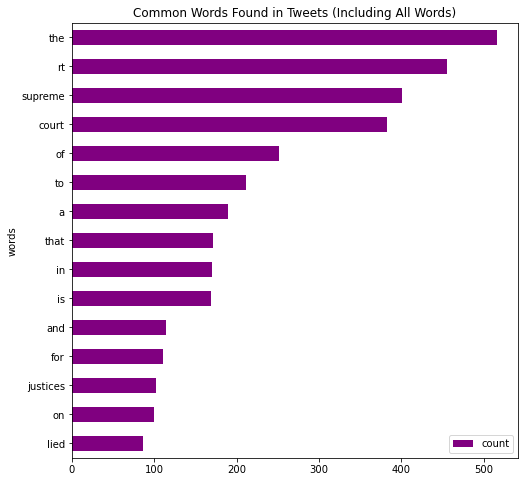

In [112]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [113]:
import nltk
from nltk.corpus import stopwords

In [114]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/wei/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [115]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['about', 'this', 'be', 'same', 'and', 'as', 'having', 'down', 'haven', 'were']

In [116]:
words_in_tweet[0]

['rt',
 'declanleary',
 'abortion',
 'fanaticism',
 'only',
 'makes',
 'sense',
 'when',
 'you',
 'accept',
 'the',
 'spiritual',
 'dimension',
 'of',
 'this',
 'conflict',
 'the',
 'cult',
 'of',
 'moloch',
 'is',
 'alive']

In [117]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['rt',
 'declanleary',
 'abortion',
 'fanaticism',
 'makes',
 'sense',
 'accept',
 'spiritual',
 'dimension',
 'conflict',
 'cult',
 'moloch',
 'alive']

In [120]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(20)

[('rt', 455),
 ('supreme', 401),
 ('court', 382),
 ('justices', 102),
 ('lied', 86),
 ('justice', 83),
 ('thomas', 75),
 ('clarence', 71),
 ('domestic', 67),
 ('v', 64),
 ('abortion', 58),
 ('draft', 58),
 ('noliewithbtc', 55),
 ('new', 52),
 ('roe', 52),
 ('women', 50),
 ('supply', 50),
 ('5', 48),
 ('c', 47),
 ('breaking', 47)]

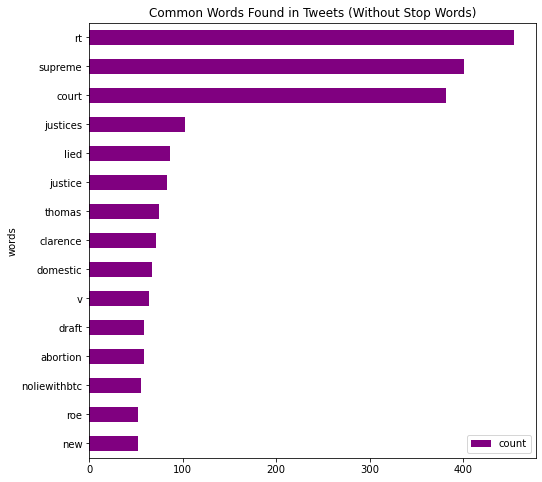

In [119]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

## Collection words removal

In [121]:
collection_words = ['supreme', 'court', 'justices','people','trumps','rt']

In [122]:
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [123]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('lied', 86),
 ('justice', 83),
 ('thomas', 75),
 ('clarence', 71),
 ('domestic', 67),
 ('v', 64),
 ('abortion', 58),
 ('draft', 58),
 ('noliewithbtc', 55),
 ('new', 52),
 ('roe', 52),
 ('women', 50),
 ('supply', 50),
 ('5', 48),
 ('c', 47)]

In [124]:
len(counts_nsw_nc)

1335

In [125]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,lied,86
1,justice,83
2,thomas,75
3,clarence,71
4,domestic,67


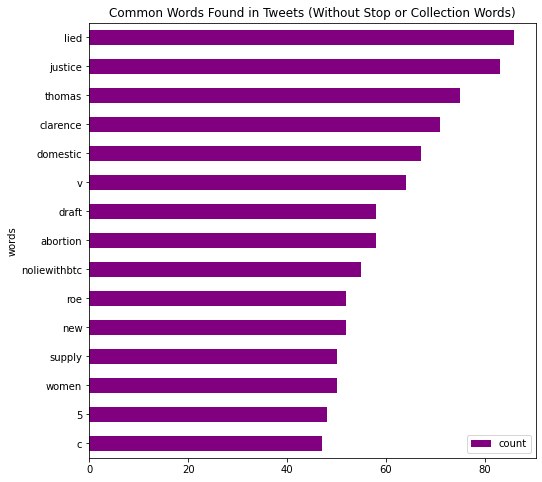

In [126]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

In [127]:
import networkx as nx
import seaborn as sns

In [128]:
from nltk import bigrams

In [129]:
import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [130]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]

[('declanleary', 'abortion'),
 ('abortion', 'fanaticism'),
 ('fanaticism', 'makes'),
 ('makes', 'sense'),
 ('sense', 'accept'),
 ('accept', 'spiritual'),
 ('spiritual', 'dimension'),
 ('dimension', 'conflict'),
 ('conflict', 'cult'),
 ('cult', 'moloch'),
 ('moloch', 'alive')]

In [131]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('clarence', 'thomas'), 65),
 (('domestic', 'supply'), 50),
 (('noliewithbtc', 'new'), 44),
 (('supply', 'infants'), 44),
 (('new', 'sen'), 42),
 (('sen', 'kirsten'), 42),
 (('kirsten', 'gillibrand'), 42),
 (('gillibrand', 'outrage'), 42),
 (('outrage', '5'), 42),
 (('5', 'lied'), 42),
 (('lied', 'lied'), 42),
 (('lied', 'c'), 42),
 (('roe', 'v'), 38),
 (('justice', 'clarence'), 37),
 (('v', 'wade'), 35),
 (('amy', 'coney'), 33),
 (('occupydemocrats', 'breaking'), 25),
 (('rschooley', 'supposed'), 24),
 (('supposed', 'believe'), 24),
 (('believe', 'faith'), 24)]

In [132]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(clarence, thomas)",65
1,"(domestic, supply)",50
2,"(noliewithbtc, new)",44
3,"(supply, infants)",44
4,"(new, sen)",42
5,"(sen, kirsten)",42
6,"(kirsten, gillibrand)",42
7,"(gillibrand, outrage)",42
8,"(outrage, 5)",42
9,"(5, lied)",42


In [133]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [134]:
d

[{('clarence', 'thomas'): 65,
  ('domestic', 'supply'): 50,
  ('noliewithbtc', 'new'): 44,
  ('supply', 'infants'): 44,
  ('new', 'sen'): 42,
  ('sen', 'kirsten'): 42,
  ('kirsten', 'gillibrand'): 42,
  ('gillibrand', 'outrage'): 42,
  ('outrage', '5'): 42,
  ('5', 'lied'): 42,
  ('lied', 'lied'): 42,
  ('lied', 'c'): 42,
  ('roe', 'v'): 38,
  ('justice', 'clarence'): 37,
  ('v', 'wade'): 35,
  ('amy', 'coney'): 33,
  ('occupydemocrats', 'breaking'): 25,
  ('rschooley', 'supposed'): 24,
  ('supposed', 'believe'): 24,
  ('believe', 'faith'): 24}]

In [136]:
pip install -U textblob

     |████████████████████████████████| 636 kB 1.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [137]:
from textblob import TextBlob

In [138]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in all_tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.03333333333333333,
 TextBlob("RT DeclanLeary Abortion fanaticism only makes sense when you accept the spiritual dimension of this conflict The cult of Moloch is alive"))

In [139]:
sentiment_objects[1].polarity, sentiment_objects[1]

(0.14999999999999997,
 TextBlob("RT TeriKanefield Good thread I had some of this in my blog post this weekendThe reason the Supreme Court has been behind the times"))

In [140]:
sentiment_objects[4].polarity, sentiment_objects[4]

(0.13636363636363635,
 TextBlob("RT NoLieWithBTC NEW Sen Kirsten Gillibrand It is an outrage that we have 5 justices on the Supreme Court who lied LIED in their c"))

In [141]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.03333333333333333,
 'RT DeclanLeary Abortion fanaticism only makes sense when you accept the spiritual dimension of this conflict The cult of Moloch is alive']

In [142]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.033333,RT DeclanLeary Abortion fanaticism only makes ...
1,0.150000,RT TeriKanefield Good thread I had some of thi...
2,0.000000,RT tnicholsmd When a Supreme Court Justice wri...
3,0.000000,RT MrAndyNgo Antifa in the Pacific NW have bec...
4,0.136364,RT NoLieWithBTC NEW Sen Kirsten Gillibrand It ...


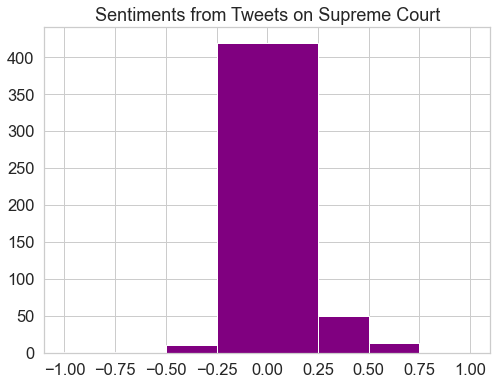

In [144]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Supreme Court")
plt.show()

In [145]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

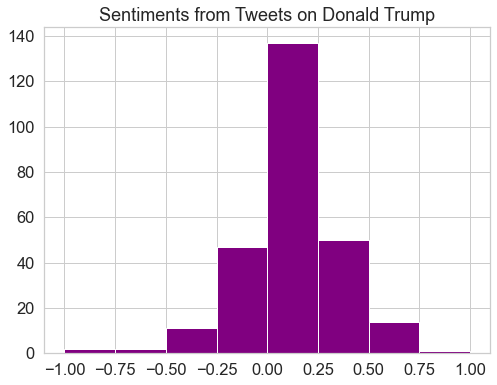

In [146]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Donald Trump")
plt.show()

## `twython`

In [3]:
pip install twython

     |████████████████████████████████| 151 kB 2.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Search API

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Import the Twython class
from twython import Twython
import json

# Load credentials from json file
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)

# Instantiate an object
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])

In [7]:
# Create our query
query = {'q': 'Donald Trump',
        'result_type': 'popular',
        'count': 3,
        'lang': 'en',
        }

In [8]:
python_tweets.search(**query)

{'statuses': [{'created_at': 'Wed May 04 21:17:22 +0000 2022',
   'id': 1521962209319940097,
   'id_str': '1521962209319940097',
   'text': 'BREAKING: Donald Trump absurdly claims that "nobody has done more for Christianity" than him — meaning that he now… https://t.co/aHlriRFVSG',
   'truncated': True,
   'entities': {'hashtags': [],
    'symbols': [],
    'user_mentions': [],
    'urls': [{'url': 'https://t.co/aHlriRFVSG',
      'expanded_url': 'https://twitter.com/i/web/status/1521962209319940097',
      'display_url': 'twitter.com/i/web/status/1…',
      'indices': [116, 139]}]},
   'metadata': {'result_type': 'popular', 'iso_language_code': 'en'},
   'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,
   'in_reply_to_user_id_str': None,
   'in_reply_to_screen_name': None,
   'user': {'id': 878284831,
    'id_str': '878284831',
    'name': 'Occupy

In [9]:
# Search tweets
dict_ = {'user': [], 'date': [], 'text': [], 'favorite_count': []}
for status in python_tweets.search(**query)['statuses']:
    dict_['user'].append(status['user']['screen_name'])
    dict_['date'].append(status['created_at'])
    dict_['text'].append(status['text'])
    dict_['favorite_count'].append(status['favorite_count'])

# Structure data in a pandas DataFrame for easier manipulation
df = pd.DataFrame(dict_)
df.sort_values(by='favorite_count', inplace=True, ascending=False)
df.head(5)

,user,date,text,favorite_count
1,SandySmithNC,Thu May 05 00:34:32 +0000 2022,DONALD TRUMP WON 🥇 🇺🇸,26823
2,JuliaDavisNews,Wed May 04 00:29:42 +0000 2022,Trump's Department of Homeland Security delaye...,11079
0,OccupyDemocrats,Wed May 04 21:17:22 +0000 2022,"BREAKING: Donald Trump absurdly claims that ""n...",3741


## Streaming API

While the previous example showed a one-off search, a more interesting case would be to collect a stream of tweets. This is done using the Twitter Streaming API, and Twython has an easy way to do it through the TwythonStreamer class. We'll need to define a class MyStreamer that inherits TwythonStreamer and then override the on_success and on_error methods, as follows.

The on_success method is called automatically when twitter sends us data, while the on_error whenever a problem occurs with the API (most commonly due to constraints of the Twitter APIs). The added method save_to_csv is a useful way to store tweets to file.

Similar to the previous example, we won't save all the data in a tweet, but only the fields we are interested in, such as: hashtags used, user name, user's location, and the text of the tweet itself. There's a lot of interesting information in a tweet, so feel free to experiment with it. Note that we'll store the tweet location as present on the user's profile, which might not correspond to the current or real location of the user sending the tweet. This is because only a small portion of Twitter users provide their current location - usually in the coordinates key of the tweet data.

In [10]:
from twython import TwythonStreamer
import csv

# Filter out unwanted data
def process_tweet(tweet):
    d = {}
    d['hashtags'] = [hashtag['text'] for hashtag in tweet['entities']['hashtags']]
    d['text'] = tweet['text']
    d['user'] = tweet['user']['screen_name']
    d['user_loc'] = tweet['user']['location']
    return d
    
    
# Create a class that inherits TwythonStreamer
class MyStreamer(TwythonStreamer):     
    # Received data
    def on_success(self, data):
            
        # Only collect tweets in English        
        if data['lang'] == 'en':
            tweet_data = process_tweet(data)
            self.save_to_csv(tweet_data)

    # Problem with the API
    def on_error(self, status_code, data):
        print(status_code, data)
        self.disconnect()
        
    # Save each tweet to csv file
    def save_to_csv(self, tweet):
        with open(r'saved_tweets.csv', 'a') as file:
            writer = csv.writer(file)
            writer.writerow(list(tweet.values()))

The next thing to do is instantiate an object of the MyStreamer class with our credentials passed as arguments, and we'll use the filter method to only collect tweets we're interested in. We'll create our filter with the track argument which provides the filter keywords, in our case "python". Besides the track argument, there are more possibilities to fine-tune your filter, listed in the [basic streaming parameters](https://developer.twitter.com/en/docs/tweets/filter-realtime/guides/basic-stream-parameters), such as: collecting tweets from selected users, languages, locations etc. The paid versions of the Streaming API would provide much more filtering options.

In [11]:
# Instantiate from our streaming class
stream = MyStreamer(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'], 
                    creds['ACCESS_TOKEN'], creds['ACCESS_SECRET'])
# Start the stream
stream.statuses.filter(track='Donald Trump')

KeyboardInterrupt: 

In [12]:
tweets = pd.read_csv("saved_tweets.csv")
tweets.head()

,[],RT @HimalayaMayflo1: Almighty God!!! \nThank you to everyone for being there with him the whole time! https://t.co/uSXb1oKDvm,YNing2016,Unnamed: 3
0,[],RT @nytimes: The Manhattan district attorney’s...,Keepitdrooling,NaN
1,[],"RT @SethAbramson: BREAKING NEWS: ""The Manhatta...",Jackson05405935,NaN
2,[],RT @HuffPost: President Donald Trump reportedl...,EvelDick,"The taint of the USA, Florida"
3,[],RT @naturalmelva: Is this part of infrastructu...,naturalmelva,Oregon
4,[],RT @MeidasTouch: The Manhattan DA has informed...,Aliphaire,"Maryland, USA"


In [13]:
tweets.columns = ['hashtags','text','user','user location']

In [14]:
tweets.head()

,hashtags,text,user,user location
0,[],RT @nytimes: The Manhattan district attorney’s...,Keepitdrooling,NaN
1,[],"RT @SethAbramson: BREAKING NEWS: ""The Manhatta...",Jackson05405935,NaN
2,[],RT @HuffPost: President Donald Trump reportedl...,EvelDick,"The taint of the USA, Florida"
3,[],RT @naturalmelva: Is this part of infrastructu...,naturalmelva,Oregon
4,[],RT @MeidasTouch: The Manhattan DA has informed...,Aliphaire,"Maryland, USA"


In [15]:
from collections import Counter
import ast

# Extract hashtags and put them in a list
list_hashtag_strings = [entry for entry in tweets.hashtags]
list_hashtag_lists = ast.literal_eval(','.join(list_hashtag_strings))
hashtag_list = [ht.lower() for list_ in list_hashtag_lists for ht in list_]

# Count most common hashtags
counter_hashtags = Counter(hashtag_list)
counter_hashtags.most_common(20)

[('trump', 31),
 ('defeatthune', 20),
 ('cadetbonespurs', 16),
 ('trumpcrimefamily', 15),
 ('demvoice1', 15),
 ('maga', 12),
 ('wtpblue', 12),
 ('onev1', 11),
 ('freshvoicesrise', 10),
 ('wethepeople', 10),
 ('donaldjtrump', 10),
 ('covid19', 10),
 ('qanon', 9),
 ('whitehouse', 9),
 ('smartnews', 9),
 ('donaldtrump', 8),
 ('backtheblue', 7),
 ('defendthepolice', 7),
 ('saveamerica', 7),
 ('cpactx', 7)]

In [17]:
pip install geopy

     |████████████████████████████████| 118 kB 2.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install gmplot

     |████████████████████████████████| 164 kB 2.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
from geopy.geocoders import Nominatim
import gmplot

geolocator = Nominatim(user_agent="my-application")

# Go through all tweets and add locations to 'coordinates' dictionary
coordinates = {'latitude': [], 'longitude': []}
for count, user_loc in enumerate(tweets.location):
    try:
        location = geolocator.geocode(user_loc)
        
        # If coordinates are found for location
        if location:
            coordinates['latitude'].append(location.latitude)
            coordinates['longitude'].append(location.longitude)
            
    # If too many connection requests
    except:
        pass
    
# Instantiate and center a GoogleMapPlotter object to show our map
gmap = gmplot.GoogleMapPlotter(30, 0, 3)

# Insert points on the map passing a list of latitudes and longitudes
gmap.heatmap(coordinates['latitude'], coordinates['longitude'], radius=20)

# Save the map to html file
gmap.draw("python_heatmap.html")

ConfigurationError: Using Nominatim with default or sample `user_agent` "my-application" is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`.